# PyEEM - Fluorescence Excitation-Emission Matrix (EEM) Spectroscopy
# *User Tutorial*
## Load the PyEEM library and display version

In [1]:
import pyeem
pyeem.__version__

'1.0.0'

## Check out the supported instruments

In [2]:
pyeem.instruments.supported

name
manufacturer supported_models           
Horiba       Aqualog-880-C       aqualog
             SPEX Fluorolog-3  fluorolog
Agilent      Cary 4E                cary

## Check out the demo datasets

In [5]:
display(pyeem.datasets.demos)
#demos_df = pyeem.datasets.demos
#demos_df[demos_df["demo_name"] == "drEEM"]["citation"].item()

,demo_name,description,citation,DOI
0,rutherford,Excitation Emission Matrix (EEM) fluorescence ...,"Rutherford, Jay W., et al. ""Excitation emissio...",10.1016/j.atmosenv.2019.117065
1,drEEM,The demo dataset contains measurements made du...,"Murphy, Kathleen R., et al. ""Fluorescence spec...",10.1039/c3ay41160e


## Download the Rutherford et al. demo dataset from S3
- Please note that this step requires an internet connection because the data is downloaded from an AWS S3 bucket.

In [6]:
"""
demo_data_dir = pyeem.datasets.download_demo(
    "examples/demo_data", demo_name="rutherford"
)
"""

'\ndemo_data_dir = pyeem.datasets.download_demo(\n    "examples/demo_data", demo_name="rutherford"\n)\n'

## Load the Rutherford et al. demo dataset

In [7]:
demo_data_dir = "demo_data/rutherford"
cal_sources = {"cigarette": "ug/ml", "diesel": "ug/ml", "wood_smoke": "ug/ml"}
dataset = pyeem.datasets.Load(
    data_dir=demo_data_dir,
    raman_instrument=None,
    absorbance_instrument="aqualog",
    eem_instrument="aqualog",
    calibration_sources=cal_sources,
)

## Let's checkout the metadata
- The metadata contains information about collected sample sets which are composed of a few different scan types. Allowable scan types include:
    - blank_eem 
    - water_raman 
    - sample_eem 
    - absorb

In [8]:
display(dataset.meta_df.head())

datetime_utc         filename collected_by  \
sample_set scan_type                                                      
1          blank_eem  2020-07-01 10:29:05   blank_eem1.csv           JR   
           sample_eem 2020-07-01 10:29:06  sample_eem1.csv           JR   
           sample_eem 2020-07-01 10:29:07  sample_eem2.csv           JR   
           sample_eem 2020-07-01 10:29:08  sample_eem3.csv           JR   
           sample_eem 2020-07-01 10:29:09  sample_eem4.csv           JR   

                                             description  \
sample_set scan_type                                       
1          blank_eem            Spectroscopy Grade Blank   
           sample_eem                            Diesel1   
           sample_eem                            Diesel2   
           sample_eem                            Diesel3   
           sample_eem  Cigarette from Cookstove Lab Hood   

                                                                comments  \
sample_set scan_type                                                       
1          blank_eem   Raman units collected with 1 pixel binning so ...   
           sample_eem  Raman units collected with 1 pixel binning so ...   
           sample_eem  Raman units collected with 1 pixel binning so ...   
           sample_eem  Raman units collected with 1 pixel binning so ...   
           sample_eem  Raman units collected with 1 pixel binning so ...   

                       dilution  Raman_Area  cigarette  diesel  wood_smoke  \
sample_set scan_type                                                         
1          blank_eem        1.0   2040.3794       0.00     0.0         0.0   
           sample_eem       1.0   2040.3794       0.00     5.0         0.0   
           sample_eem       1.0   2040.3794       0.00     5.0         0.0   
           sample_eem       1.0   2040.3794       0.00     5.0         0.0   
           sample_eem       1.0   2040.3794       0.77     0.0         0.0   

                       calibration_sample  prototypical_sample  test_sample  \
sample_set scan_type                                                          
1          blank_eem                False                False        False   
           sample_eem                True                False         True   
           sample_eem                True                 True        False   
           sample_eem                True                False         True   
           sample_eem                True                False         True   

                      original_date  \
sample_set scan_type                  
1          blank_eem     2016-11-30   
           sample_eem    2016-11-30   
           sample_eem    2016-11-30   
           sample_eem    2016-11-30   
           sample_eem    2016-11-30   

                                                                filepath  \
sample_set scan_type                                                       
1          blank_eem   /home/roboat/Documents/roboat/PyEEM/examples/d...   
           sample_eem  /home/roboat/Documents/roboat/PyEEM/examples/d...   
           sample_eem  /home/roboat/Documents/roboat/PyEEM/examples/d...   
           sample_eem  /home/roboat/Documents/roboat/PyEEM/examples/d...   
           sample_eem  /home/roboat/Documents/roboat/PyEEM/examples/d...   

                      prototypical_source test_sources  
sample_set scan_type                                    
1          blank_eem                                []  
           sample_eem              diesel           []  
           sample_eem              diesel           []  
           sample_eem              diesel           []  
           sample_eem           cigarette           []

## Checkout the metadata summary information

In [9]:
dataset.metadata_summary_info()

,Date Range,Number of blank EEMs,Number of sample EEMs,Number of absorbance scans
0,"(Timestamp('2020-07-01 10:29:05'), Timestamp('...",20,107,107


## Create a preprocessing routine
- The demo dataset contains raw scans, in order to analyze and interpret this data, we must first apply several preprocessing steps.

In [10]:
routine_df = pyeem.preprocessing.create_routine(
    crop = True,
    discrete_wavelengths = False,
    gaussian_smoothing = False,
    blank_subtraction = True,
    inner_filter_effect = False,
    raman_normalization = True,
    scatter_removal = True,
    dilution = False,
)
routine_df

,step_name,step_name,hdf_path
step_order,,,
0,Raw,raw,raw_sample_sets/
1,Crop,crop,preprocessing/filters/crop
2,Blank Subtraction,blank_subtraction,preprocessing/corrections/blank_subtraction
3,Raman Normalization,raman_normalization,preprocessing/corrections/raman_normalization
4,Scatter Removal,scatter_removal,preprocessing/corrections/scatter_removal
5,Complete,complete,preprocessing/complete/


## Execute the preprocessing routine
- Each preprocessing step has certain knobs and dials you can tune to have them run to your liking. It is worth checking the documentation to learn more about these customizations.
- Please note that depending on the steps and settings you've chosen as well as your dataset's size, the time it takes for this step to complete will vary.

In [11]:
crop_dimensions = {"emission_bounds": (246, 573), "excitation_bounds": (224, float("inf"))}
routine_results_df = pyeem.preprocessing.perform_routine(
    routine_df,
    dataset.meta_df,
    dataset.hdf,
    crop_dims = crop_dimensions,
    raman_norm = "metadata",
    fill = "interp"
)
routine_results_df

step_completed  \
sample_set scan_type  filename        step_name                           
1          blank_eem  blank_eem1.csv  raw                           True   
                                      crop                          True   
           sample_eem sample_eem1.csv raw                           True   
                                      crop                          True   
                                      blank_subtraction             True   
...                                                                  ...   
16         sample_eem sample_eem1.csv raman_normalization           True   
                                      scatter_removal               True   
                                      complete                      True   
17         blank_eem  blank_eem1.csv  raw                           True   
                                      crop                          True   

                                                          step_exception  \
sample_set scan_type  filename        step_name                           
1          blank_eem  blank_eem1.csv  raw                           None   
                                      crop                          None   
           sample_eem sample_eem1.csv raw                           None   
                                      crop                          None   
                                      blank_subtraction             None   
...                                                                  ...   
16         sample_eem sample_eem1.csv raman_normalization           None   
                                      scatter_removal               None   
                                      complete                      None   
17         blank_eem  blank_eem1.csv  raw                           None   
                                      crop                          None   

                                                                                                    hdf_path  
sample_set scan_type  filename        step_name                                                              
1          blank_eem  blank_eem1.csv  raw                                   raw_sample_sets/1/blank_eem1.csv  
                                      crop                       preprocessing/filters/crop/1/blank_eem1.csv  
           sample_eem sample_eem1.csv raw                                  raw_sample_sets/1/sample_eem1.csv  
                                      crop                      preprocessing/filters/crop/1/sample_eem1.csv  
                                      blank_subtraction    preprocessing/corrections/blank_subtraction/1/...  
...                                                                                                      ...  
16         sample_eem sample_eem1.csv raman_normalization  preprocessing/corrections/raman_normalization/...  
                                      scatter_removal      preprocessing/corrections/scatter_removal/16/s...  
                                      complete                     preprocessing/complete/16/sample_eem1.csv  
17         blank_eem  blank_eem1.csv  raw                                  raw_sample_sets/17/blank_eem1.csv  
                                      crop                      preprocessing/filters/crop/17/blank_eem1.csv  

[670 rows x 3 columns]

## Check to see if any of the steps failed to complete
- If you are using a demo dataset, you should see an empty dataframe.

In [12]:
routine_results_df[routine_results_df["step_exception"].notna()]

,,,,step_completed,step_exception,hdf_path
sample_set,scan_type,filename,step_name,,,


## Visualize the preprocessing steps

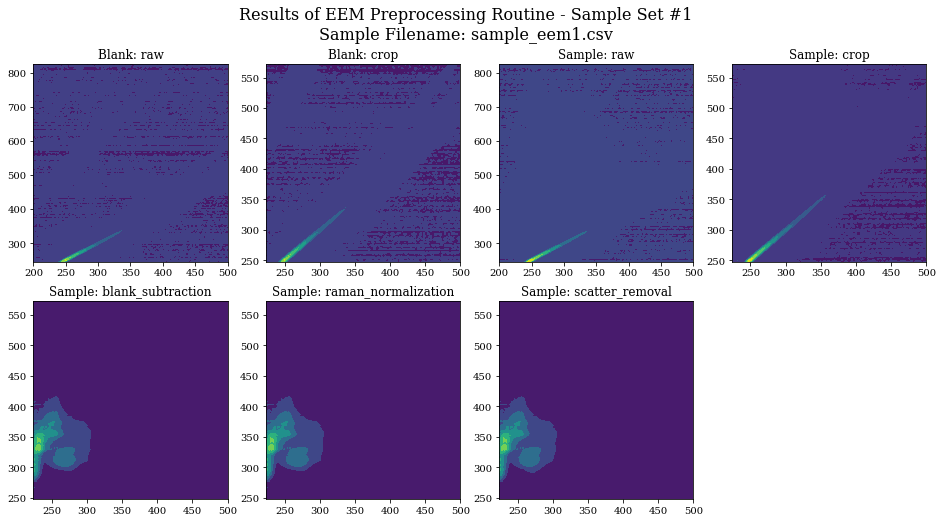

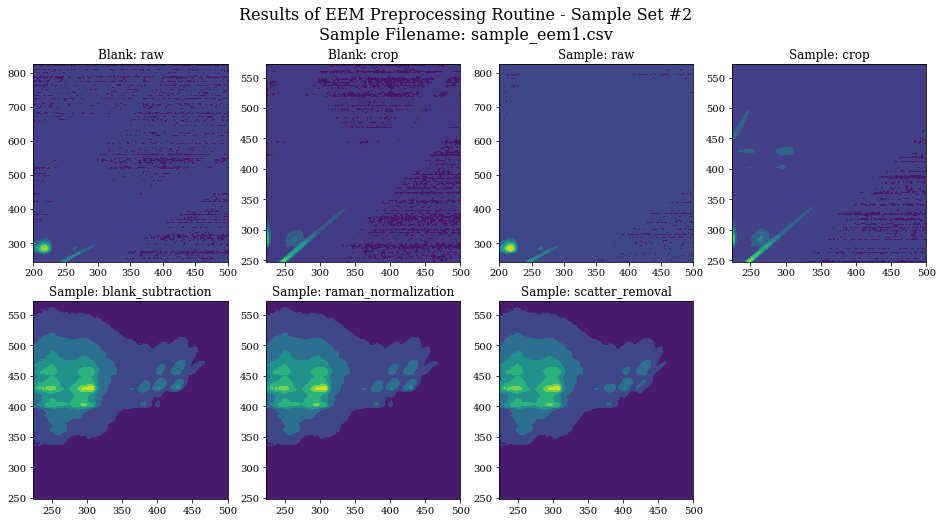

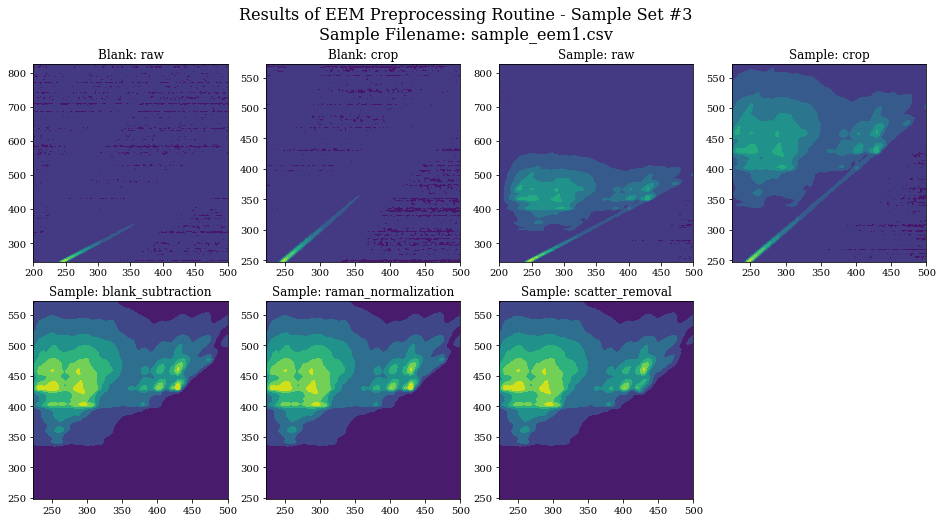

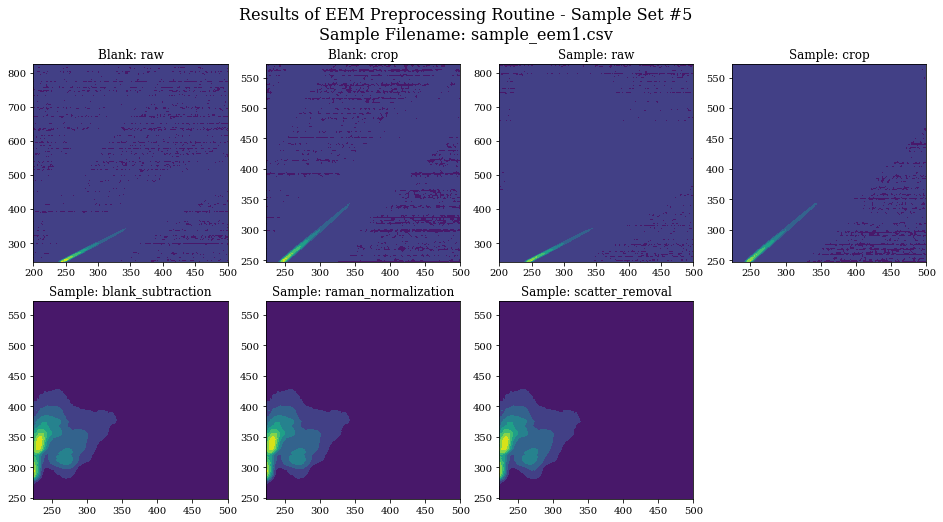

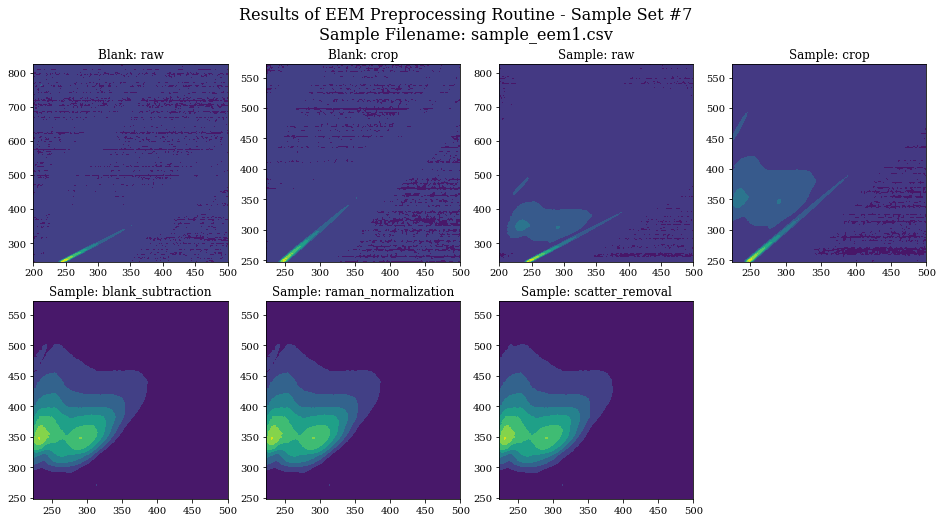

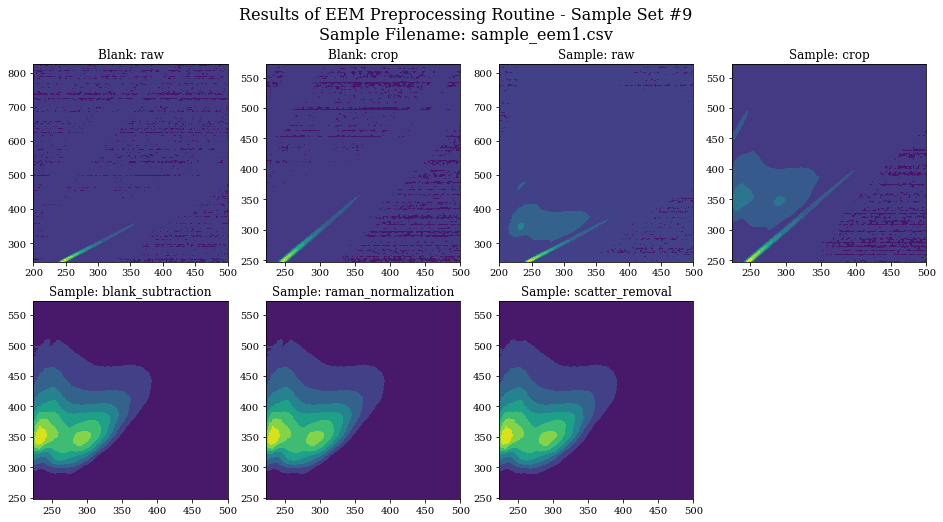

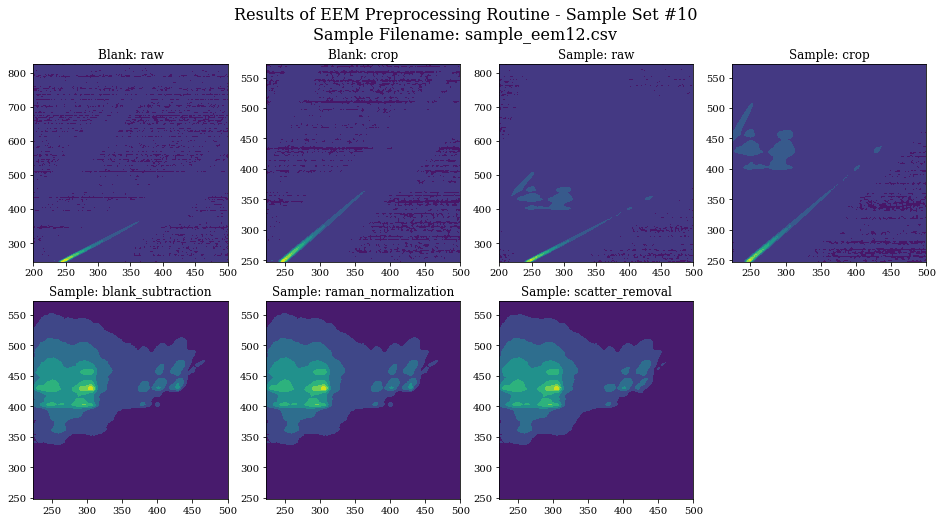

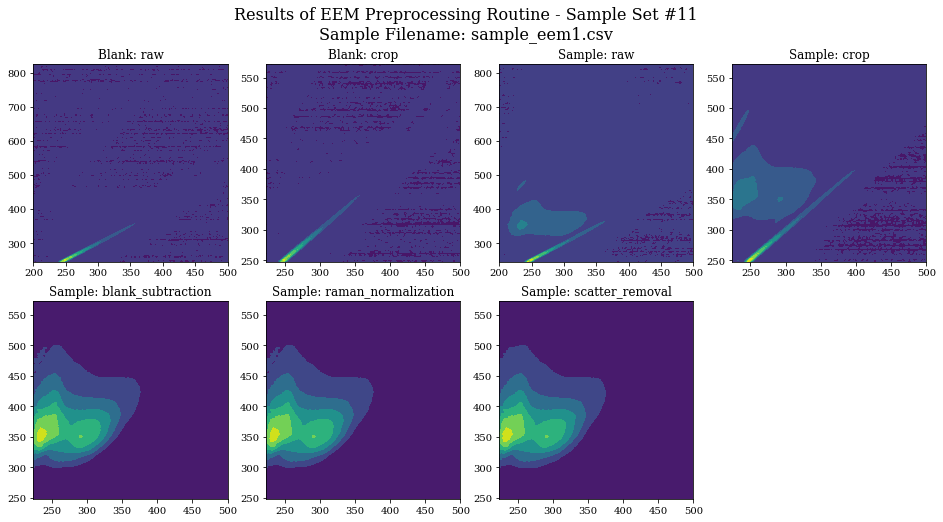

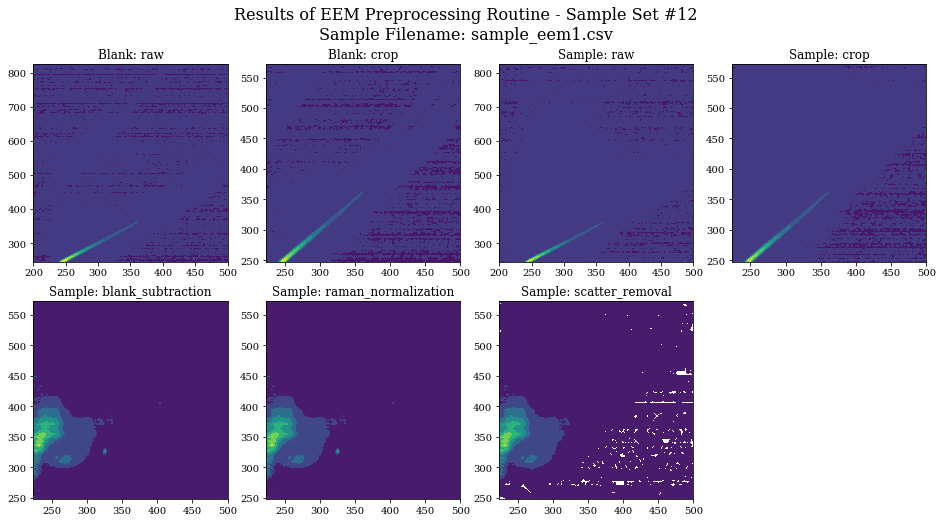

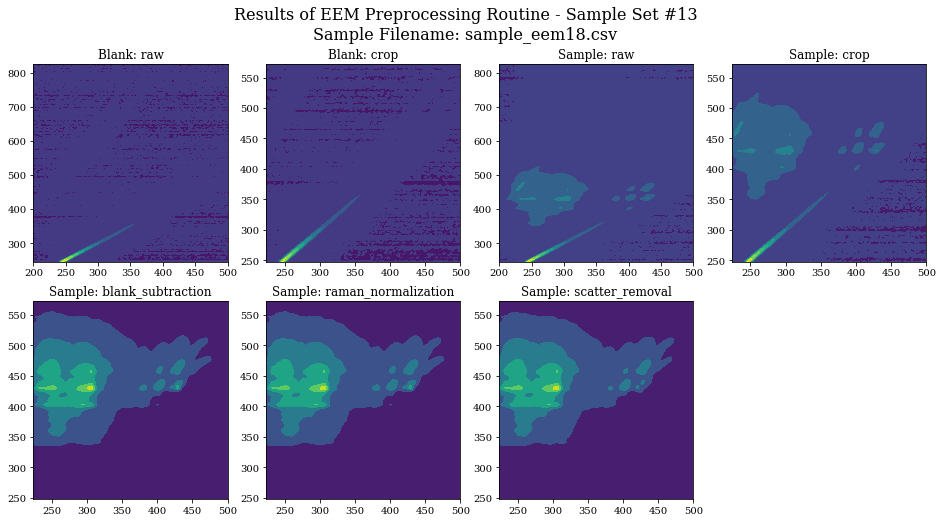

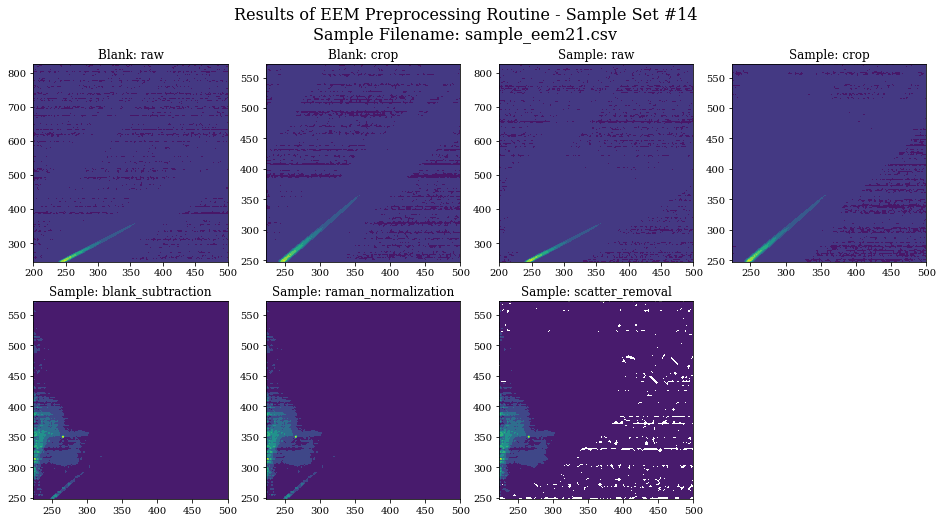

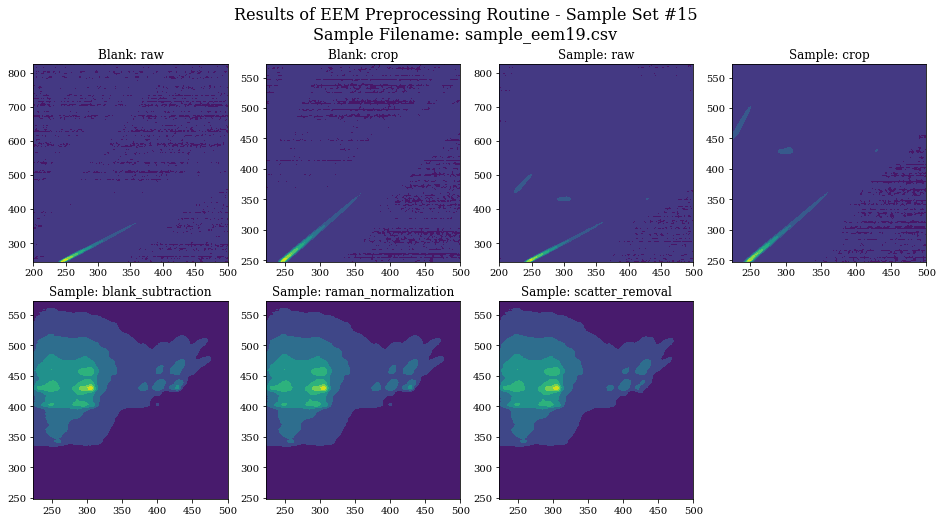

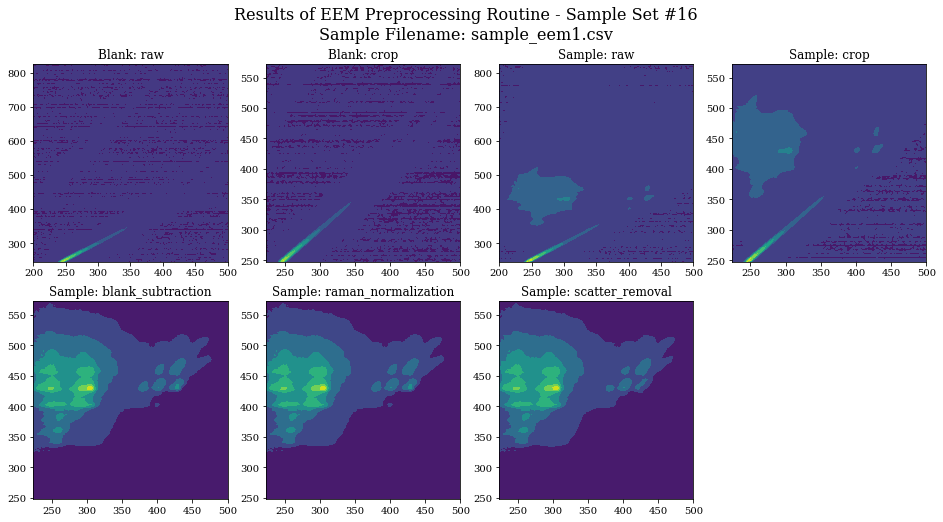

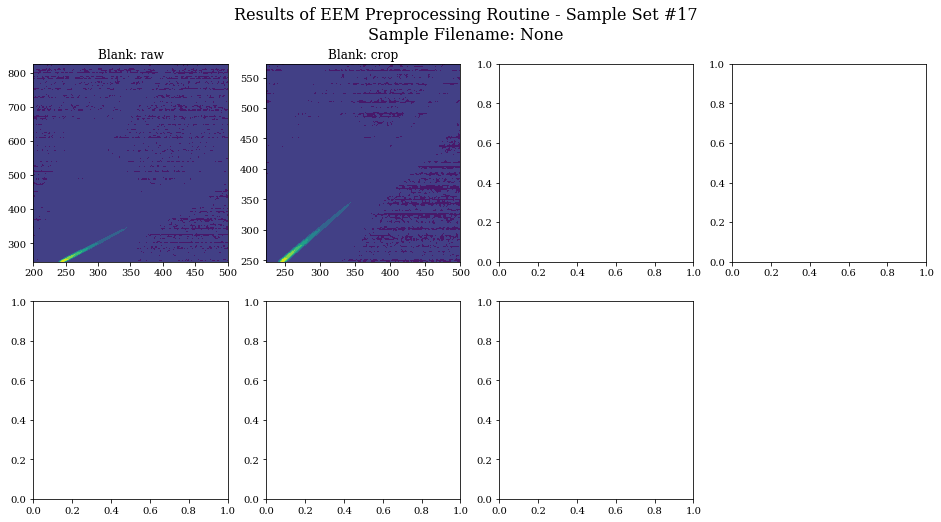

In [13]:
pyeem.plots.plot_preprocessing(routine_results_df, dataset.hdf)

## Load the calibration information

In [15]:
cal_df = pyeem.preprocessing.calibration(dataset, routine_results_df)
cal_df

concentration  \
source     units slope        intercept     r_squared                  
cigarette  ug/ml 3.048575e+07 -4.186520e+06 0.859988            0.77   
                                            0.859988            5.00   
                                            0.859988            5.00   
                                            0.859988            5.00   
                                            0.859988            5.00   
...                                                              ...   
wood_smoke ug/ml 2.598192e+07 -6.158682e+06 0.357905            0.50   
                                            0.357905            0.50   
                                            0.357905            2.00   
                                            0.357905            1.00   
                                            0.357905            5.00   

                                                       integrated_intensity  \
source     units slope        intercept     r_squared                         
cigarette  ug/ml 3.048575e+07 -4.186520e+06 0.859988           3.825501e+07   
                                            0.859988           2.103459e+08   
                                            0.859988           1.692198e+08   
                                            0.859988           1.766623e+08   
                                            0.859988           1.504793e+08   
...                                                                     ...   
wood_smoke ug/ml 2.598192e+07 -6.158682e+06 0.357905           1.185176e+07   
                                            0.357905          -1.319890e+06   
                                            0.357905           1.124381e+07   
                                            0.357905           4.875264e+06   
                                            0.357905           2.545074e+07   

                                                       prototypical_sample  \
source     units slope        intercept     r_squared                        
cigarette  ug/ml 3.048575e+07 -4.186520e+06 0.859988                 False   
                                            0.859988                  True   
                                            0.859988                  True   
                                            0.859988                 False   
                                            0.859988                 False   
...                                                                    ...   
wood_smoke ug/ml 2.598192e+07 -6.158682e+06 0.357905                 False   
                                            0.357905                 False   
                                            0.357905                 False   
                                            0.357905                 False   
                                            0.357905                  True   

                                                                                         hdf_path  
source     units slope        intercept     r_squared                                              
cigarette  ug/ml 3.048575e+07 -4.186520e+06 0.859988     preprocessing/complete/1/sample_eem4.csv  
                                            0.859988     preprocessing/complete/1/sample_eem5.csv  
                                            0.859988     preprocessing/complete/1/sample_eem6.csv  
                                            0.859988     preprocessing/complete/7/sample_eem1.csv  
                                            0.859988     preprocessing/complete/9/sample_eem1.csv  
...                                                                                           ...  
wood_smoke ug/ml 2.598192e+07 -6.158682e+06 0.357905   preprocessing/complete/15/sample_eem17.csv  
                                            0.357905    preprocessing/complete/15/sample_eem1.csv  
                                            0.357905    preprocessing/compl

## Checkout the calibration summary information

In [16]:
pyeem.preprocessing.calibration_summary_info(cal_df)

AttributeError: module 'pyeem.preprocessing' has no attribute 'calibration_summary_info'

## Plot the calibration curves

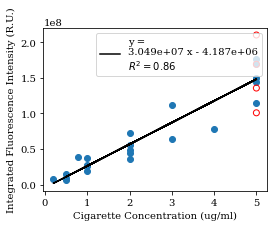

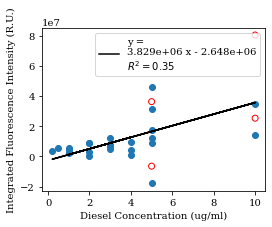

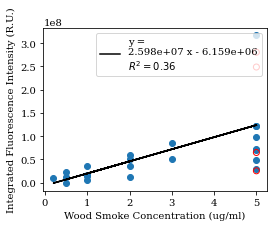

In [17]:
pyeem.plots.plot_calibration_curves(cal_df)

## Create prototypical spectra and then plot them

## Augmented Spectra - Single Sources
### Create augmented single source spectra by scaling each prototypical spectrum across a range of concentrations

## Plot the augmented single source spectra

## Augmented Spectra - Mixtures
### Create augmented mixture spectra by scaling and combining the prototypical spectra across a range of concentrations

## Plot the augmented mixture spectra

## Create metadata template for future algal pigment measurements

In [ ]:
calibration_sources = ["chloropyhll", "phycocyanin", "fucoxanthin"]

pyeem.datasets.create_metadata_template("metadata_template.csv",
                                        calibration_sources=calibration_sources, 
                                        file_format="csv")

In [ ]:
import pandas as pd
pd.read_csv("metadata_template.csv")